In [210]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import torch
from torch import nn
import ML
import itertools
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Features
> Season
> Number_of_beds
> Economical_state

In [288]:
Number_of_beds = np.arange(80, 140)
Economical_state = np.random.random(60)
Season = []
temp = 0
for i in itertools.cycle([1, 2, 3, 4]):
    temp += 1
    Season.append(i)
    Season.append(i)
    Season.append(i)
    if temp == 20:
        break

Number_of_persons = range(1, 61)

In [289]:
data = pd.DataFrame(data={"Number_of_persons": Number_of_persons,
                          "Season": Season,
                          "Number_of_beds": Number_of_beds,
                          "Economical_state": Economical_state}, index=range(1, 61))
data

,Number_of_persons,Season,Number_of_beds,Economical_state
1,1,1,80,0.254575
2,2,1,81,0.239712
3,3,1,82,0.126250
4,4,2,83,0.431263
5,5,2,84,0.828004
6,6,2,85,0.539602
7,7,3,86,0.017219
8,8,3,87,0.390419
9,9,3,88,0.288135
10,10,4,89,0.673010


In [332]:
input_size = 4
hidden_size = 128
output_size = 1
num_layer = 12
epochs = 100
learning_rate = 0.1

In [333]:
dataloader = ML.DataLoader_Me(data=data, seq=12, batch_size=8, dr=True)
train, test = dataloader.train, dataloader.test
model = ML.Health(input_size=input_size, hidden_size=hidden_size, output_size=output_size, num_layer=num_layer)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  0%|          | 0/100 [00:00<?, ?it/s]

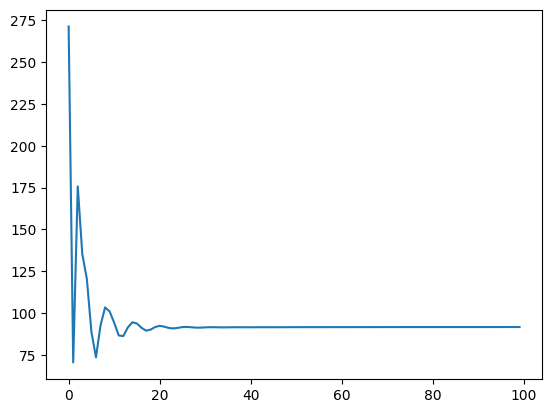

In [334]:
[epoch_count, loss_values], model = ML.train_model(model=model, train=train, loss_fn=loss_fn, optimizer=optimizer,
                                                   epochs=epochs)
with torch.inference_mode():
    plt.plot(epoch_count, loss_values)

In [335]:
[test_loss, r2] = ML.test_model(model=model, test=test, loss_fn=loss_fn)
print(f"Test Loss is {test_loss:.6f} and R2 is {r2 * 100:.0f}")

Test Loss is 718.875000 and R2 is -7100


In [320]:
x = [[56, 3, 134, 0.181], [57, 3, 135, 0.111], [58, 4, 136, 0.281]]

# x = dataloader.scaler.transform(x)
# print(x)
x = torch.tensor([x], dtype=torch.float)

with torch.inference_mode():
    y = model(torch.tensor(x))
    
y

C:\Users\keipj\AppData\Local\Temp\ipykernel_2848\1191488478.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = model(torch.tensor(x))


tensor([[30.4540]])

In [322]:
with torch.inference_mode():
    for batch,(x, y) in enumerate(test):
        print(batch)
        if batch == 1:
            # print(x)
            y_pred = model(x)
            print(y_pred, y)
            

0
1
tensor([[30.5812],
        [30.5812],
        [30.5812],
        [30.5812]]) tensor([[57.],
        [54.],
        [55.],
        [52.]])


In [284]:
test.dataset

[(tensor([[4.6000e+01, 4.0000e+00, 1.2500e+02, 6.8159e-01],
          [4.7000e+01, 4.0000e+00, 1.2600e+02, 9.5027e-01],
          [4.8000e+01, 4.0000e+00, 1.2700e+02, 1.2037e-01]]),
  tensor([49.])),
 (tensor([[4.7000e+01, 4.0000e+00, 1.2600e+02, 9.5027e-01],
          [4.8000e+01, 4.0000e+00, 1.2700e+02, 1.2037e-01],
          [4.9000e+01, 1.0000e+00, 1.2800e+02, 9.7247e-02]]),
  tensor([50.])),
 (tensor([[4.8000e+01, 4.0000e+00, 1.2700e+02, 1.2037e-01],
          [4.9000e+01, 1.0000e+00, 1.2800e+02, 9.7247e-02],
          [5.0000e+01, 1.0000e+00, 1.2900e+02, 3.8799e-01]]),
  tensor([51.])),
 (tensor([[4.9000e+01, 1.0000e+00, 1.2800e+02, 9.7247e-02],
          [5.0000e+01, 1.0000e+00, 1.2900e+02, 3.8799e-01],
          [5.1000e+01, 1.0000e+00, 1.3000e+02, 6.8712e-01]]),
  tensor([52.])),
 (tensor([[ 50.0000,   1.0000, 129.0000,   0.3880],
          [ 51.0000,   1.0000, 130.0000,   0.6871],
          [ 52.0000,   2.0000, 131.0000,   0.5007]]),
  tensor([53.])),
 (tensor([[ 51.0000,   1